<a href="https://colab.research.google.com/github/SumitDas21/TIHS_2025_SUMIT_DAS/blob/main/classification_with_logistic_regression_and_random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TOPIC : IRIS Flower Classification using Logistics Regression and Random Foresting

**SUBMITTED BY :- Sumit Dass**

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?

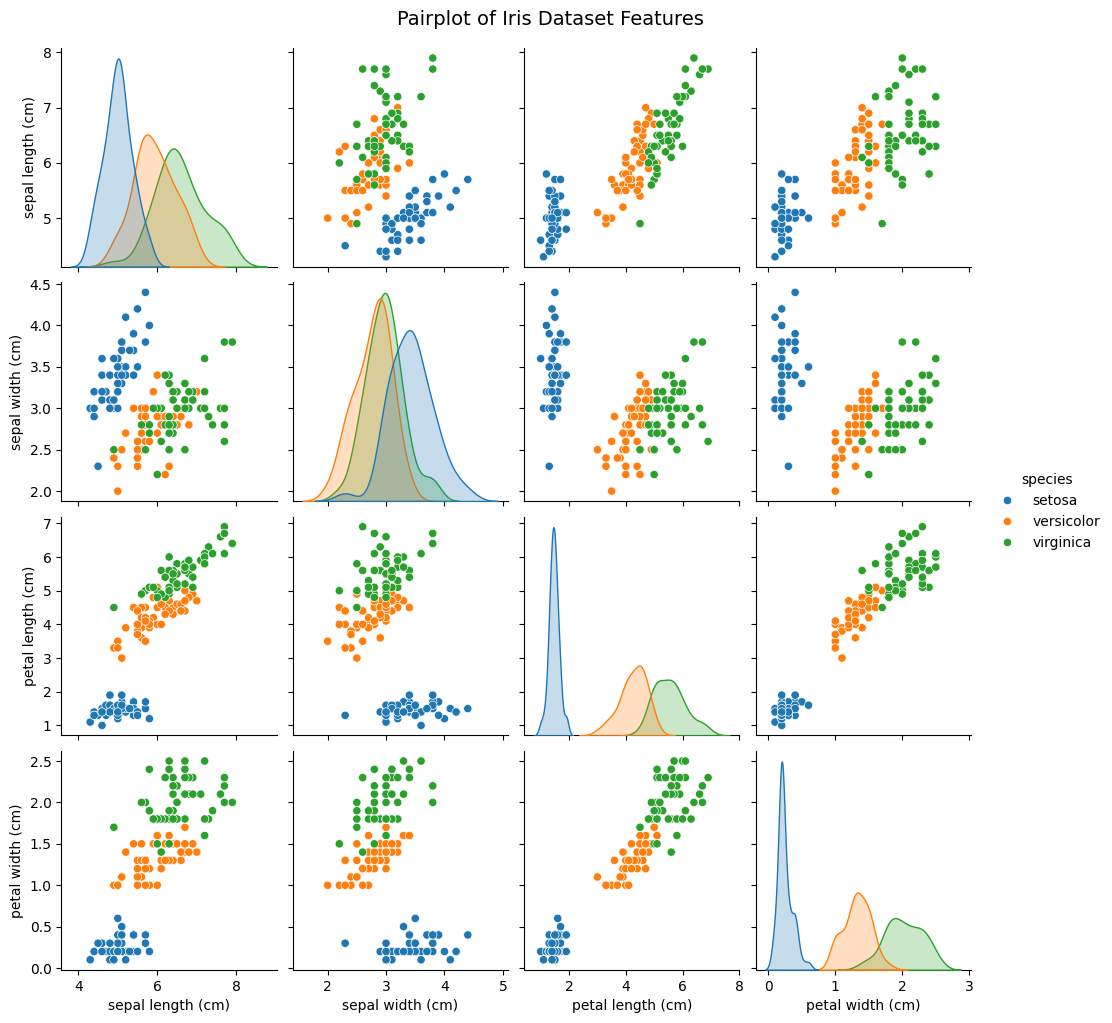

Observation from pairplot:
------------------------------------------------
1. Petal length and petal width clearly separate species best.
   - Setosa forms a distinct cluster (small petals, narrow width).
   - Versicolor and Virginica are somewhat overlapping, but still separable.
2. Sepal length and sepal width show significant overlap, making them less useful.
------------------------------------------------

inverse_species_map: {np.str_('setosa'): 0, np.str_('versicolor'): 1, np.str_('virginica'): 2}
Unique values in Z after mapping: [0 1 2]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


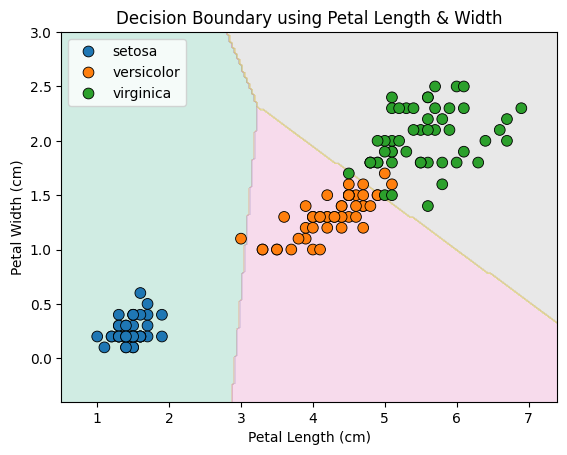

Final Answer: The two most useful features for separating species are 'Petal Length' and 'Petal Width'.


In [ ]:
# Question 1: From the scatterplot/pairplot which two features seem most useful for separating species?

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ==========================
# Load the Iris dataset
# ==========================
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

# Combine for easy viewing
df = pd.concat([X, y], axis=1)

# ==========================
# Pairplot visualization
# ==========================
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02, fontsize=14)
plt.show()

print("Observation from pairplot:")
print("------------------------------------------------")
print("1. Petal length and petal width clearly separate species best.")
print("   - Setosa forms a distinct cluster (small petals, narrow width).")
print("   - Versicolor and Virginica are somewhat overlapping, but still separable.")
print("2. Sepal length and sepal width show significant overlap, making them less useful.")
print("------------------------------------------------\n")

# ==========================
# Decision boundary (using petal length & width)
# ==========================
X_pw = X[["petal length (cm)", "petal width (cm)"]]
X_train, X_test, y_train, y_test = train_test_split(X_pw, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
model = LogisticRegression(multi_class="ovr", max_iter=200)
model.fit(X_train, y_train)

# Create decision boundary
x_min, x_max = X_pw.iloc[:, 0].min() - 0.5, X_pw.iloc[:, 0].max() + 0.5
y_min, y_max = X_pw.iloc[:, 1].min() - 0.5, X_pw.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Map species names back to numeric labels for plotting the decision boundary
inverse_species_map = {v: k for k, v in species_map.items()}
Z = np.array([inverse_species_map[name] for name in Z.ravel()]).reshape(xx.shape)

# Debugging prints
print("inverse_species_map:", inverse_species_map)
print("Unique values in Z after mapping:", np.unique(Z))


# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Set2")
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="species", data=df, s=60, edgecolor="k")
plt.title("Decision Boundary using Petal Length & Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.show()

# ==========================
# Final Answer
# ==========================
print("Final Answer: The two most useful features for separating species are 'Petal Length' and 'Petal Width'.")

**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

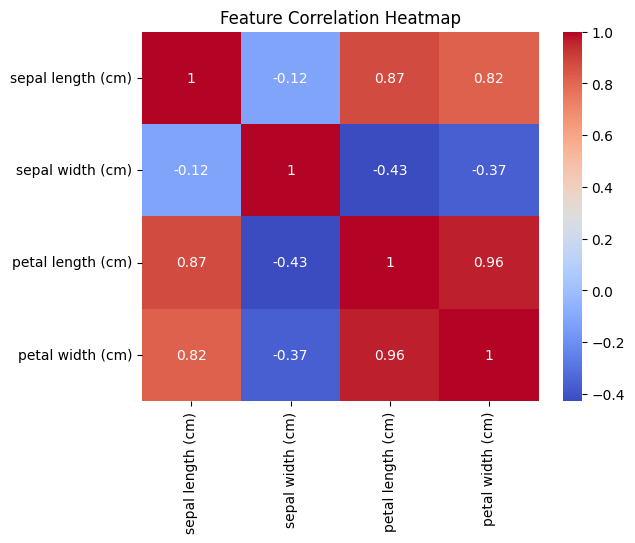

In [ ]:

# Import required libraries
from sklearn.datasets import load_iris  # Ensure this import is included
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

# Combine for quick view
df = pd.concat([X, y], axis=1)

# Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

 **Question 3**.

  Why do we split the dataset into training and testing sets?

In [ ]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

# Question 3 Answer
print("\nQuestion 3: Why do we split the dataset into training and testing sets?")
print("Answer:")
print("- To train the model on one part of the data (training set).")
print("- To evaluate it on unseen data (testing set).")
print("- This ensures we measure how well the model generalizes, not just memorizes.")
print("- If the model performs well only on training data but poorly on test data, it indicates overfitting.")

Training samples: 105
Test samples: 45

Question 3: Why do we split the dataset into training and testing sets?
Answer:
- To train the model on one part of the data (training set).
- To evaluate it on unseen data (testing set).
- This ensures we measure how well the model generalizes, not just memorizes.
- If the model performs well only on training data but poorly on test data, it indicates overfitting.


**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

**Question 5.**

Do you think this assumption holds for the Iris dataset? Why or why not?

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



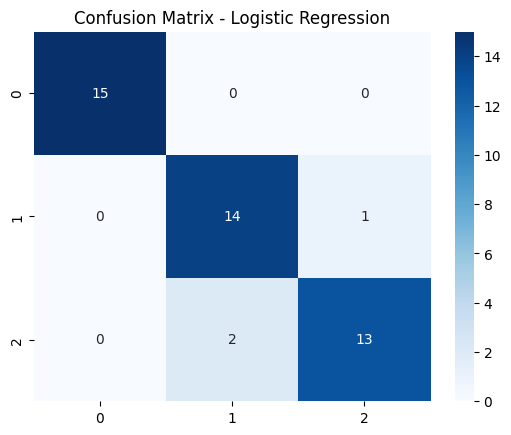

In [ ]:
# Question 4 & 5: Explanation inside code

"""
Question 4.
Why does Logistic Regression assume a linear decision boundary?

Answer:
Logistic regression computes probabilities using a linear combination of input features:
    z = w · x + b
This value z is passed through a sigmoid (binary case) or softmax (multiclass case).
The decision boundary occurs where probabilities of two classes are equal:
    w1 · x + b1 = w2 · x + b2
This simplifies to a linear equation in x (a line in 2D, a hyperplane in higher dimensions).
Therefore, logistic regression assumes a linear decision boundary.

-------------------------------------------------

Question 5.
Does this assumption hold for the Iris dataset?

Answer:
- The Iris dataset has 3 classes: Setosa, Versicolor, and Virginica.
- Setosa is linearly separable from the other two, which is why logistic regression
  classifies it perfectly (100% precision and recall).
- However, Versicolor and Virginica overlap in feature space.
  Logistic regression still does well (~93% accuracy), but some misclassifications occur.
- Hence, the linear decision boundary assumption holds perfectly for Setosa,
  but not completely for Versicolor vs Virginica.
  A non-linear model (like SVM with RBF kernel or Decision Trees) may perform better.
"""

# Let's also reconfirm with the trained model results
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Accuracy & classification report
print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

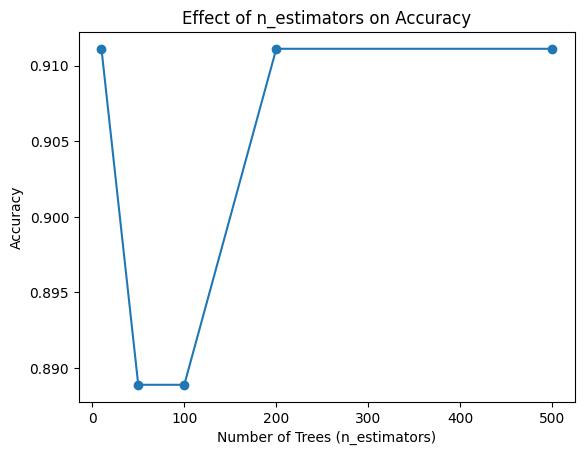

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

estimators = [10, 50, 100, 200, 500]
accuracies = []

for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(estimators, accuracies, marker='o')
plt.title("Effect of n_estimators on Accuracy")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()

**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

# Random Forest (ensure it's trained)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Accuracy (Random Forest): 0.8888888888888888

Classification Report (Random Forest):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

In [ ]:

import numpy as np
from sklearn.datasets import make_classification

# Create a larger noisy dataset
X_noisy, y_noisy = make_classification(
    n_samples=5000, n_features=50, n_informative=10, n_redundant=10,
    n_classes=3, random_state=42
)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_noisy, y_noisy)
print("Logistic Regression Accuracy (Noisy Data):", log_reg.score(X_noisy, y_noisy))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_noisy, y_noisy)
print("Random Forest Accuracy (Noisy Data):", rf.score(X_noisy, y_noisy))

Logistic Regression Accuracy (Noisy Data): 0.7196
Random Forest Accuracy (Noisy Data): 1.0
